In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil.parser
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('bus203_all.csv')

In [5]:
def journey_time(x):
    timedelta = dateutil.parser.parse(x.max()) - dateutil.parser.parse(x.min())
    return timedelta.seconds

In [6]:
df['journey_time'] = df.groupby('journey_number')['timestamp'].transform(journey_time)

Since we only should have only JourneyStartedEvent per journey, we can use it to filter unique journeys..

Sanity check:

In [8]:
len(df['journey_number'].unique())

3600

In [9]:
len(df[df['event'] == 'JourneyStartedEvent'])

3600

/home/max/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


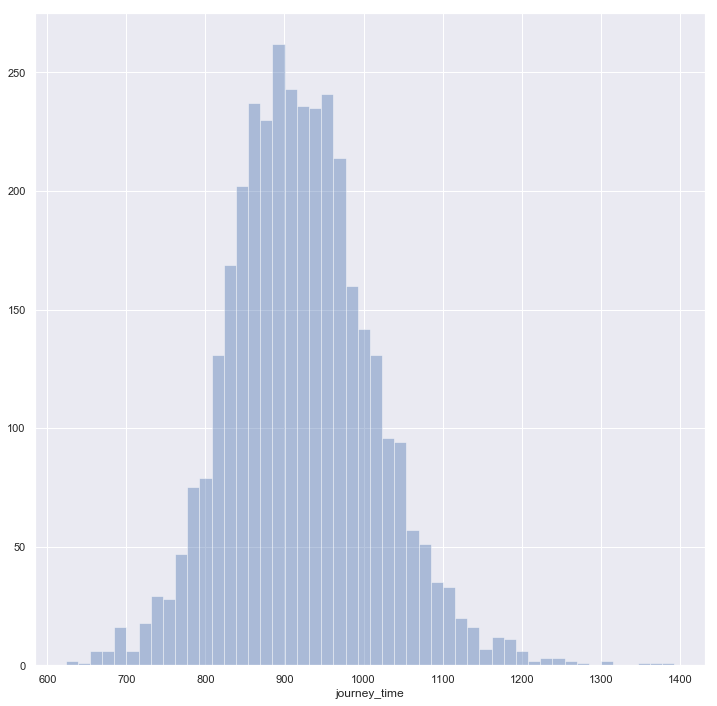

In [7]:
fig, ax = plt.subplots(1, figsize=(12,12))
sns.distplot(df[df['event'] == 'JourneyStartedEvent']['journey_time'], kde=False)

In [23]:
df['timestamp'][0]

'2018-02-16T04:48:40.0000000+01:00'

/home/max/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


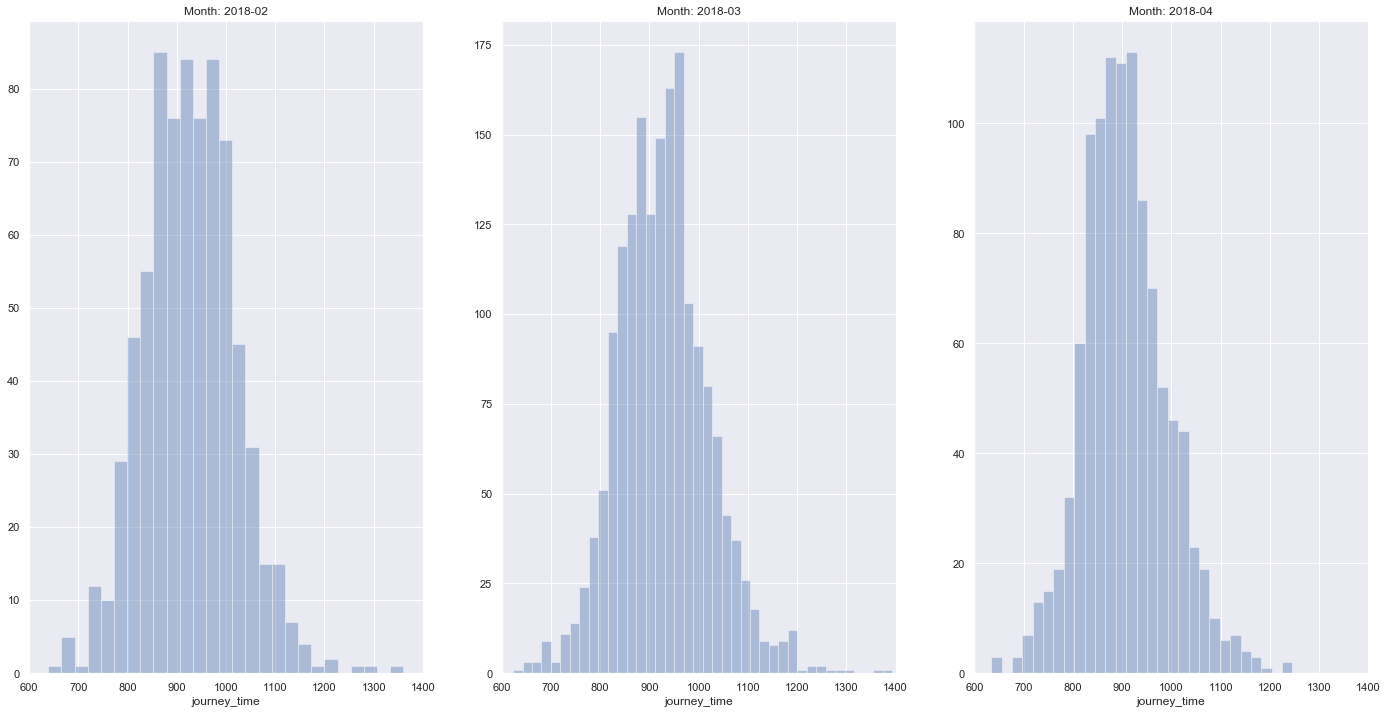

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(18,18))
months = ['2018-02', '2018-03', '2018-04']
for ax, month in zip(axes, months):
    sns.distplot(
        df[(df['timestamp'].str.contains(month)) & (df['event'] == 'JourneyStartedEvent')]['journey_time'],
        kde=False,
        ax=ax
    )
    ax.set_title(f'Month: {month}')
    ax.set_xlim(600, 1400)

Lets see time of day distributions?

In [89]:
# better to store datetime objects directly
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('Europe/Stockholm')

In [79]:
intervals = [(i, i+2) for i in range(0, 24, 2)]

In [93]:
# lets make a slice of only the JourneyStartedEvents to reduce the rows to process
df_slice = df[df['event'] == 'JourneyStartedEvent']

/home/max/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


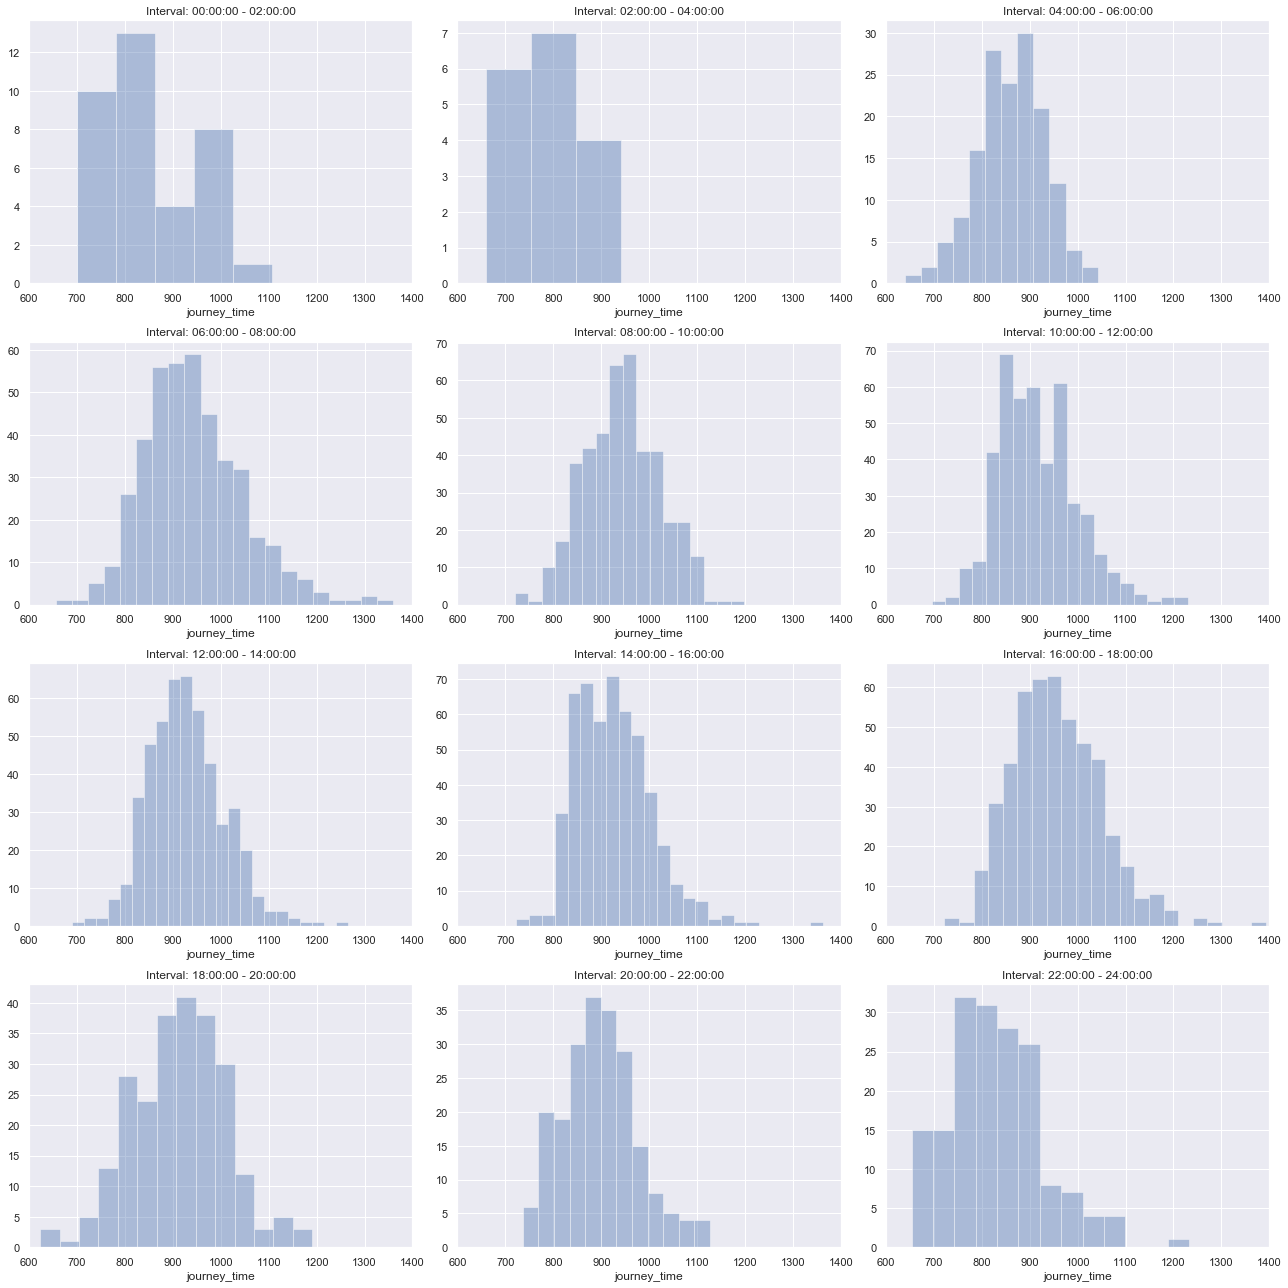

In [136]:
fig, axes = plt.subplots(4, 3, figsize=(18, 18))
intervals = [(i, i+2) for i in range(0, 24, 2)]
for ax, interval in zip(axes.flatten(), intervals):
    _=sns.distplot(
        df_slice[df_slice.apply(
            lambda x: x['timestamp'].hour >= interval[0] and x['timestamp'].hour < interval[1], axis=1)]['journey_time'],
        kde=False,
        ax=ax
    )
    lower_bound = f'0{interval[0]}' if interval[0] < 10 else f'{interval[0]}'
    upper_bound = f'0{interval[1]}' if interval[1] < 10 else f'{interval[1]}'
    ax.set_title(f'Interval: {lower_bound}:00:00 - {upper_bound}:00:00')
    ax.set_xlim(600, 1400)
plt.tight_layout()

In [99]:
intervals = [(i, i+2) for i in range(0, 24, 2)]
averages = dict()
for interval in intervals:
    lower_bound = f'0{interval[0]}' if interval[0] < 10 else f'{interval[0]}'
    upper_bound = f'0{interval[1]}' if interval[1] < 10 else f'{interval[1]}'
    mean = df_slice[df_slice.apply(lambda x: x['timestamp'].hour >= interval[0] and x['timestamp'].hour < interval[1], axis=1)]\
    ['journey_time'].mean()
    averages[f'{lower_bound}:00-{upper_bound}:00'] = mean

Text(0.5, 0, 'Time of day interval')

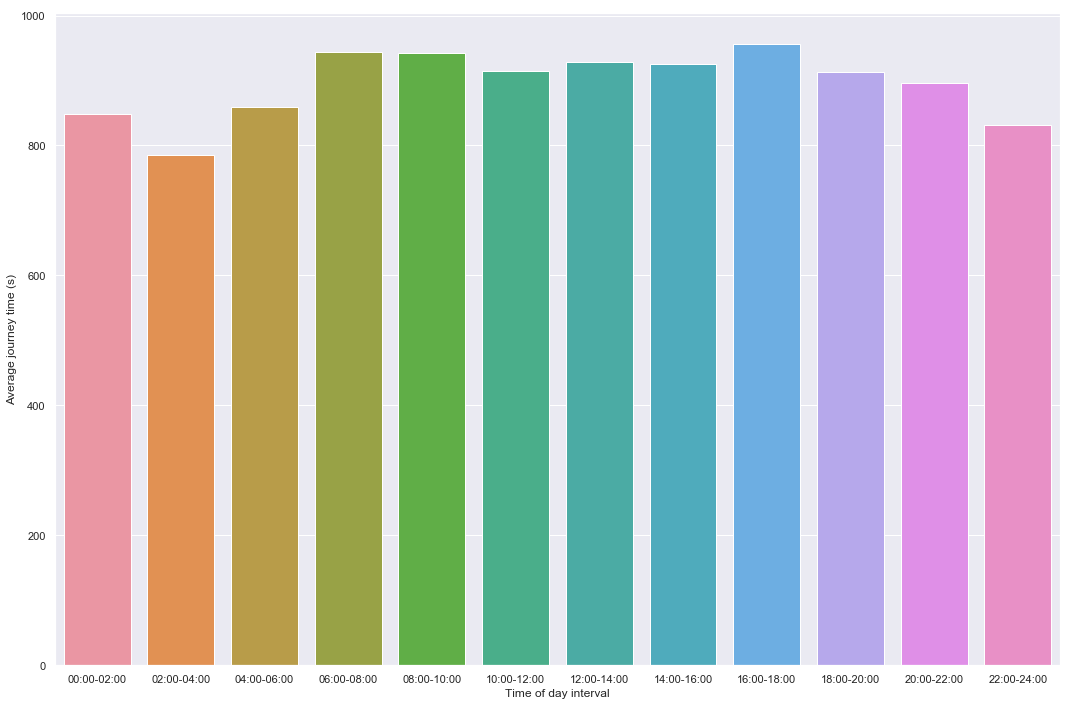

In [142]:
fig, ax = plt.subplots(1, figsize=(18, 12))
sns.barplot([x for x in averages.keys()], [x for x in averages.values()], ax=ax)
ax.set_ylabel('Average journey time (s)')
ax.set_xlabel('Time of day interval')